In [15]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dataset

df = pd.read_csv('esrb_dataset_clean.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,sum_descriptors,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,3,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,3,T


In [4]:
# check missing values

df.isna().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_language             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
sum_descriptors             0
esrb_ratin

## Splitting Dataset

In [5]:
# split the dataset

X = df.drop(['title','console','esrb_rating','sum_descriptors'], axis=1) # title, console and sum_descriptors are not relevant for predictions
y = df['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [6]:
# check shape of the train and test data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1915, 30)
(1915,)
(479, 30)
(479,)


## Model 1: Multi-class Logistic Regression

In [25]:
# initiate model: Multinomial Logistic Regression
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=1234)

# define the parameter grid 
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],        
    'max_iter': [100, 200, 300],                    
}

# perform grid search
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100.0, 'max_iter': 100}


In [7]:
# using LR model with best params

lr = LogisticRegression(solver='newton-cg', multi_class='multinomial', C=100.0, random_state=1234)

lr.fit(X_train, y_train)
y_pred_tr = lr.predict(X_train)
y_pred = lr.predict(X_test)

print(f'Logistic Regression train Accuracy: {accuracy_score(y_train,y_pred_tr):.4f}')
print(f'Logistic Regression test Accuracy: {accuracy_score(y_test,y_pred):.4f}')

print(classification_report(y_test, y_pred))

Logistic Regression train Accuracy: 0.8653
Logistic Regression test Accuracy: 0.8601
              precision    recall  f1-score   support

           E       0.98      0.97      0.98       108
          ET       0.79      0.84      0.81       109
           M       0.84      0.85      0.84        80
           T       0.84      0.81      0.83       182

    accuracy                           0.86       479
   macro avg       0.86      0.87      0.87       479
weighted avg       0.86      0.86      0.86       479



## Model 2: Gradient Boosting

In [8]:
# initiate model: Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=1234)

# define the parameter grid 
param_dist = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [3, 5, 10]
}

# perform grid search
grid_search = GridSearchCV(gb, param_dist, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 300}


In [10]:
# using GB model with best params

gb = GradientBoostingClassifier(n_estimators=300, max_depth=5, random_state=1234)

gb.fit(X_train, y_train)
y_pred_tr = gb.predict(X_train)
y_pred = gb.predict(X_test)

print(f'Gradient Boosting Train Accuracy: {accuracy_score(y_train,y_pred_tr):.4f}')
print(f'Gradient Boosting Test Accuracy: {accuracy_score(y_test,y_pred):.4f}')

print(classification_report(y_test, y_pred))

Gradient Boosting Train Accuracy: 0.9211
Gradient Boosting Test Accuracy: 0.8497
              precision    recall  f1-score   support

           E       0.95      0.97      0.96       108
          ET       0.79      0.86      0.82       109
           M       0.80      0.85      0.82        80
           T       0.85      0.77      0.81       182

    accuracy                           0.85       479
   macro avg       0.85      0.86      0.85       479
weighted avg       0.85      0.85      0.85       479



## Model 3: Random Forest

In [10]:
# initialize model: Random Forest

rf = RandomForestClassifier(random_state=1234)

# define the parameter grid to search
param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}


In [12]:
# using RF model with best params

rf = RandomForestClassifier(n_estimators=500,min_samples_split=10,random_state=1234)
rf.fit(X_train, y_train)
y_pred_tr = rf.predict(X_train)
y_pred = rf.predict(X_test)

print(f'Random Forest Training Set Accuracy: {accuracy_score(y_train,y_pred_tr):.4f}')
print(f'Random Forest Test Set Accuracy: {accuracy_score(y_test,y_pred):.4f}')

print(classification_report(y_test, y_pred))

Random Forest Training Set Accuracy: 0.9159
Random Forest Test Set Accuracy: 0.8559
              precision    recall  f1-score   support

           E       0.95      0.97      0.96       108
          ET       0.80      0.86      0.83       109
           M       0.80      0.86      0.83        80
           T       0.86      0.78      0.82       182

    accuracy                           0.86       479
   macro avg       0.85      0.87      0.86       479
weighted avg       0.86      0.86      0.86       479



## Confusion Matrices

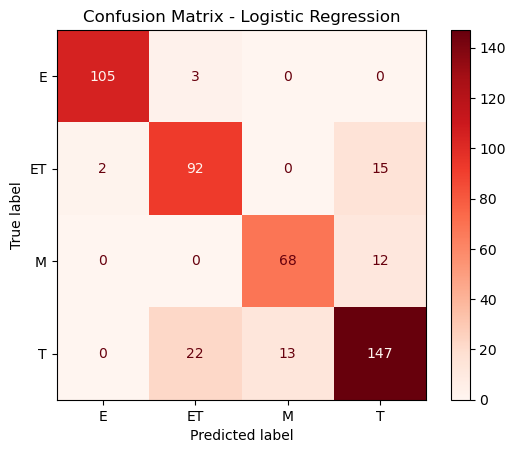

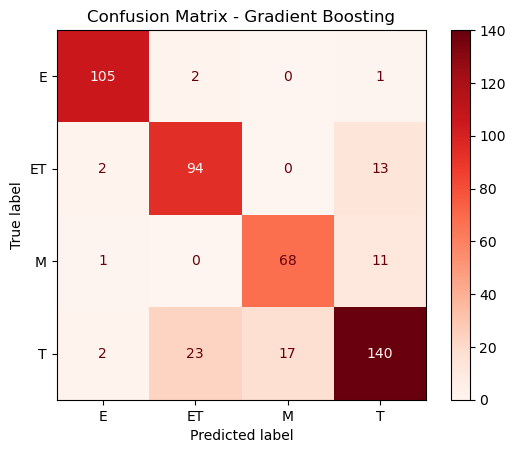

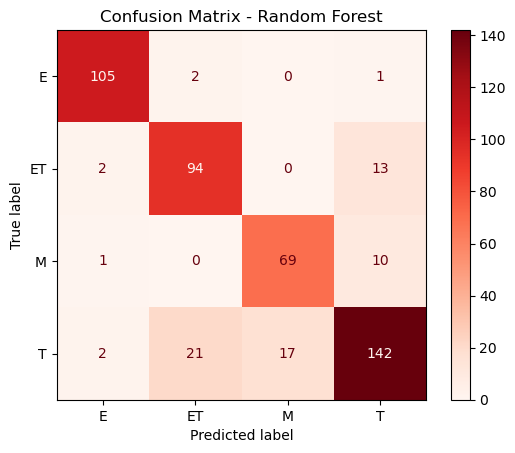

In [22]:
models = [lr, gb, rf]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Random Forest']

for model, model_name in zip(models, model_names):
    plot_confusion_matrix(model, X_test, y_test, cmap='Reds')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

### Conclusion

* Upon observing the performance metrics (accuracy and f1 scores) and analyzing the confusion matrices for the 3 models used, **Multiclass Logistic Regression** (accuracy: **0.86**) seems like the best model in **predicting ESRB ratings**.
* Logistic Regression has the **least variance** between accuracy scores for training and test datasets as well.